In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from main_preprocess import output_path_lung_wov_attenuation as input_attenuation
from main_preprocess import load_nifti_convert_to_numpy, convert_numpy_to_nifti_and_save

/Users/bruger/anaconda3/envs/bachelor/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [50]:
nifti_path_0002='/Users/bruger/Desktop/Bachelor/attenuation filer/Lung-Pilot-1_0002_SERIES0024.nii.gz'
nifti_path_0018='/Users/bruger/Desktop/Bachelor/attenuation filer/Lung-Pilot-1_0018_SERIES0019.nii.gz'

roi_seg_path_0002='/Users/bruger/Desktop/Bachelor/roi_series_0002/Segmentation-bilateral_ggo-label.nii.gz'
roi_seg_path_0018='/Users/bruger/Desktop/Bachelor/roi_series_0018/roi_0018-Segment_1-label.nii.gz'

In [51]:
ct_0002 = load_nifti_convert_to_numpy(input_path=nifti_path_0002)
roi_seg_0002 = load_nifti_convert_to_numpy(input_path=roi_seg_path_0002)

In [52]:
ct_0018 = load_nifti_convert_to_numpy(input_path=nifti_path_0018)
roi_seg_0018 = load_nifti_convert_to_numpy(input_path=roi_seg_path_0018)

In [53]:
ct_roi_result_0002 = np.multiply(ct_0002,roi_seg_0002)
ct_roi_result_0018 = np.multiply(ct_0018,roi_seg_0018)

In [54]:
output_path_0002='/Users/bruger/Desktop/Bachelor/roi_ct_results/roi_result_0002.nii.gz'
output_path_0018='/Users/bruger/Desktop/Bachelor/roi_ct_results/roi_result_0018.nii.gz'

convert_numpy_to_nifti_and_save(np_file=ct_roi_result_0002, output_path=output_path_0002, original_nifti_path=nifti_path_0002)
convert_numpy_to_nifti_and_save(np_file=ct_roi_result_0018, output_path=output_path_0018, original_nifti_path=nifti_path_0018)

saving
saving


In [55]:
seg_result_0002_arr = ct_roi_result_0002.flatten()
seg_result_0018_arr = ct_roi_result_0018.flatten()

In [56]:
seg_result_0002_arr=seg_result_0002_arr[seg_result_0002_arr != 0]
seg_result_0018_arr=seg_result_0018_arr[seg_result_0018_arr != 0]

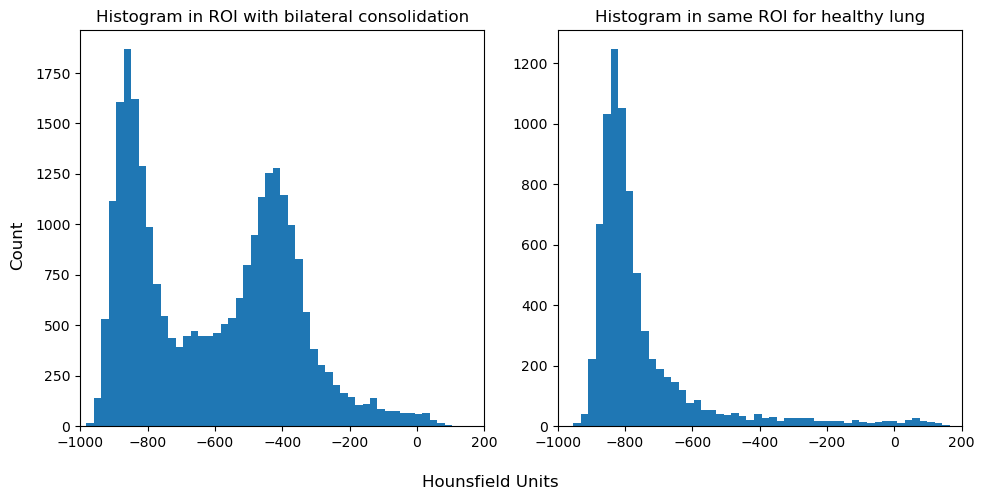

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Plot histogram for seg_result_0002_arr on the first subplot
axes[0].hist(seg_result_0002_arr, bins=50)
axes[0].set_title('Histogram in ROI with bilateral consolidation')
axes[0].set_xlim(-1000, 200)

# Plot histogram for seg_result_0018_arr on the second subplot
axes[1].hist(seg_result_0018_arr, bins=50)
axes[1].set_title('Histogram in same ROI for healthy lung')
axes[1].set_xlim(-1000, 200)

# Set common x and y labels for both subplots
fig.supxlabel('Hounsfield Units', fontsize=12)
fig.supylabel('Count', fontsize=12)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()
